In [1]:
from sklearn import *
import sklearn
import pandas
import numpy
import matplotlib
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/jamesmcfarland/aini-hackathon-jamesleo.git
df= jamesD = shuffle(pandas.read_csv("aini-hackathon-jamesleo/combinedData.csv"), random_state=12)
df.head(3)


fatal: destination path 'aini-hackathon-jamesleo' already exists and is not an empty directory.


,Review,Class
6383,Got these as a treat for myself while doing so...,0
2230,Just recieved this to the JBL charge 3 and I h...,1
8413,Loved the product but hated the limited sound ...,0


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
y = df["Class"]
cv = TfidfVectorizer()
x_vect = cv.fit_transform(df["Review"])
x_vect.shape


(9477, 8625)

In [4]:
print(cv.vocabulary_.get(u'bought'))

1278


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_vect,y, test_size=0.2, random_state=12 )

In [8]:
#from sklearn.naive_bayes import MultinomialNB#
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
#from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#from sklearn.svm import SVC
#svc = SVC(probability=True, kernel='rbf')

    
clf = AdaBoostClassifier(n_estimators=1000 ,learning_rate=.25).fit(x_train, y_train)

In [9]:
predicts = clf.predict(x_test)
print(predicts)

[1 0 1 ... 0 1 0]


In [10]:
clf.score(x_test, y_test)

0.8544303797468354

In [11]:
ypreds = clf.predict(x_test)
tpos, tneg, fpos, fneg = 0, 0, 0, 0

for prediction, correct_value in zip(ypreds, y_test):
    if prediction == 1 and correct_value == 1:
        tpos += 1
    if prediction == 1 and correct_value == 0:
        fpos += 1
    if prediction == 0 and correct_value == 0:
        tneg += 1
    if prediction == 0 and correct_value == 1:
        fneg += 1
        
        
        
recall = (tpos) / (tpos + fneg)

print(f'Recall: {recall:.2f}')
print(f'Sklearn recall: {sklearn.metrics.recall_score(y_test, ypreds):.2f}')
precision = (tpos) / (tpos + fpos)
print(f'Precision: {precision:.2f}')
print(f'Skearn precision: {sklearn.metrics.precision_score(y_test, ypreds):.2f}')
accuracy = (tpos + tneg) / (tpos + tneg + fpos + fneg)
print(f'Accuracy: {accuracy:.2f}')
print(f'Sklearn accuracy: {clf.score(x_test, y_test):.2f}')

Recall: 0.85
Sklearn recall: 0.85
Precision: 0.87
Skearn precision: 0.87
Accuracy: 0.85
Sklearn accuracy: 0.85


<Figure size 1440x720 with 0 Axes>

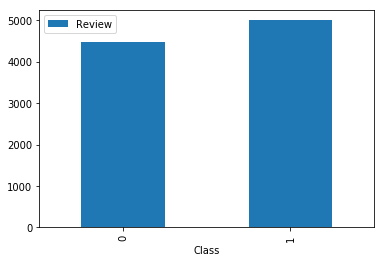

In [12]:
plt.figure(figsize=(20,10))

df.groupby('Class').count().plot.bar(ylim=0)
plt.show()

In [ ]:
#This is basically all we have to do
#https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

In [ ]:
print("Hey")